In [1]:
%%html
<img src="images/logo.png", width=600, height=600>

# Analyse exploratoire des données et featuring

**Analyses univariée et bivariée des données pour gérer les valeurs manquantes, les outliers, les corrélations et les distributions.**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from my_module import*
from dataprep.eda import create_report

sns.set(style="darkgrid", palette="rainbow")
pd.set_option("display.float_format", lambda x: "%.2f" % x)

import warnings
warnings.filterwarnings('ignore')

NumExpr defaulting to 4 threads.


# 1 - EDA

In [3]:
df = pd.read_csv("data_prep/df.csv")
df.head()

Area alpha-3   region    dist  Population (1000)  pop_evo_rate  \
0     Afghanistan     AFG     Asia 5590.38           36296.11          0.34   
1         Albania     ALB   Europe 1603.53            2884.17         -0.05   
2         Algeria     DZA   Africa 1340.39           41389.19          0.21   
3  American Samoa     ASM  Oceania     nan              55.62         -0.05   
4         Andorra     AND   Europe  711.55              77.00         -0.07   

   Urbanisation rate  gdp ($) per capita  Food supply quantity (g/capita/day)  \
0               0.25              513.09                                 5.00   
1               0.60             4514.20                                29.00   
2               0.72             4109.70                                17.00   
3               0.87                 nan                                  nan   
4               0.88            38962.61                                  nan   

   Import Quantity  Production  Chicken_meat_ratio  Livestock ratio (LSU %)  \
0         28937.00    27850.00                0.10                     2.04   
1         17280.00    12912.00                0.14                    10.54   
2             0.00   262965.00                0.32                    21.30   
3              nan         nan                 nan                      nan   
4              nan         nan                 nan                      nan   

   Price indices  production value  GPIndex(2015)  Political stability  \
0         113.83               nan          82.65                -2.75   
1         105.13       26080000.00         157.14                 0.38   
2         111.02      563007000.00         101.10                -0.83   
3            nan               nan            nan                 1.20   
4         104.89               nan            nan                 1.42   

   Animal protein ratio  AV Duties  
0                  0.19      32.10  
1                  0.54      10.00  
2                  0.28      30.00  
3                   nan        nan  
4                   nan        nan

### 1-1 Etude des corrélations pour affiner le nombre de variables

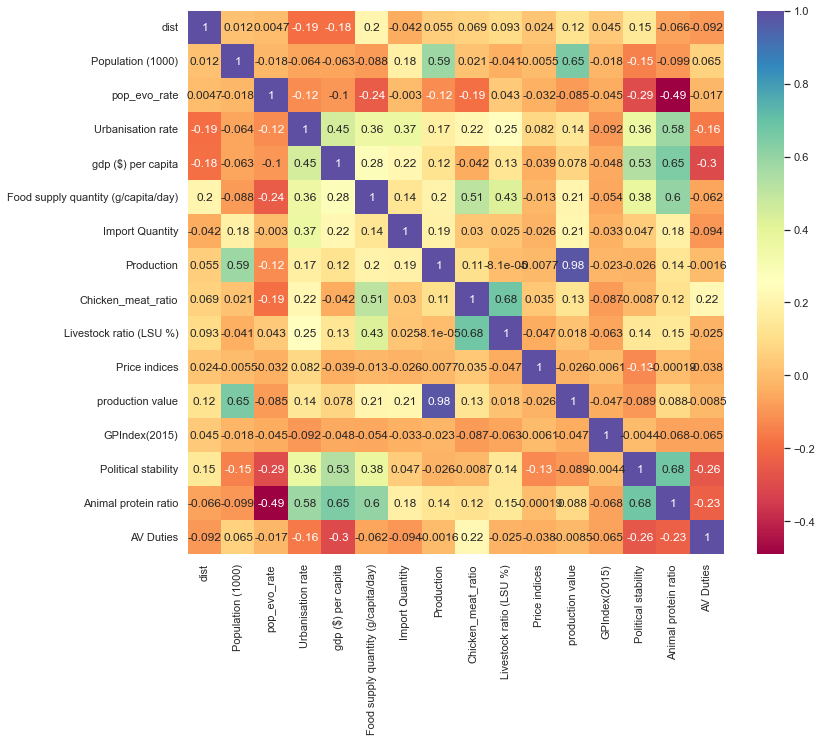

In [4]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='Spectral');

Forte correlation (comme suspectée) entre production et production value. Suppression de cette dernière pour laquelle nous avons moins de données.  
RAS pour les autres variables.

In [5]:
del df["production value"]

### 1-2 Analyse des valeurs manquantes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Area                                 251 non-null    object 
 1   alpha-3                              249 non-null    object 
 2   region                               248 non-null    object 
 3   dist                                 221 non-null    float64
 4   Population (1000)                    236 non-null    float64
 5   pop_evo_rate                         230 non-null    float64
 6   Urbanisation rate                    234 non-null    float64
 7   gdp ($) per capita                   211 non-null    float64
 8   Food supply quantity (g/capita/day)  179 non-null    float64
 9   Import Quantity                      173 non-null    float64
 10  Production                           177 non-null    float64
 11  Chicken_meat_ratio              

Nombreuses valeurs manquantes

In [7]:
df.isna().sum()

Area                                    0
alpha-3                                 2
region                                  3
dist                                   30
Population (1000)                      15
pop_evo_rate                           21
Urbanisation rate                      17
gdp ($) per capita                     40
Food supply quantity (g/capita/day)    72
Import Quantity                        78
Production                             74
Chicken_meat_ratio                     74
Livestock ratio (LSU %)                56
Price indices                          51
GPIndex(2015)                          56
Political stability                    53
Animal protein ratio                   79
AV Duties                              99
dtype: int64

Analyses des valeus manquantes pour chacune des variables.

In [8]:
df[df["Production"].isna()]

Area alpha-3    region     dist  \
3                                  American Samoa     ASM   Oceania      nan   
4                                         Andorra     AND    Europe   711.55   
6                                        Anguilla     AIA  Americas  6710.57   
10                                          Aruba     ABW  Americas  7685.88   
15                                        Bahrain     BHR      Asia  4843.39   
..                                            ...     ...       ...      ...   
246                                Norfolk Island     NFK   Oceania 17511.67   
247                                      Pitcairn     PCN   Oceania 15152.12   
248  South Georgia and the South Sandwich Islands     SGS  Americas      nan   
249                        Svalbard and Jan Mayen     SJM    Europe      nan   
250          United States Minor Outlying Islands     UMI   Oceania      nan   

     Population (1000)  pop_evo_rate  Urbanisation rate  gdp ($) per capita  \
3                55.62         -0.05               0.87                 nan   
4                77.00         -0.07               0.88            38962.61   
6                14.58          0.13               1.02            19488.09   
10              105.37          0.04               0.43            29005.63   
15             1494.08          0.44               0.89            23742.95   
..                 ...           ...                ...                 ...   
246                nan           nan                nan                 nan   
247                nan           nan                nan                 nan   
248                nan           nan                nan                 nan   
249                nan           nan                nan                 nan   
250                nan           nan                nan                 nan   

     Food supply quantity (g/capita/day)  Import Quantity  Production  \
3                                    nan              nan         nan   
4                                    nan              nan         nan   
6                                    nan              nan         nan   
10                                   nan              nan         nan   
15                                   nan              nan         nan   
..                                   ...              ...         ...   
246                                  nan              nan         nan   
247                                  nan              nan         nan   
248                                  nan              nan         nan   
249                                  nan              nan         nan   
250                                  nan              nan         nan   

     Chicken_meat_ratio  Livestock ratio (LSU %)  Price indices  \
3                   nan                      nan            nan   
4                   nan                      nan         104.89   
6                   nan                      nan         101.44   
10                  nan                      nan          97.81   
15                  nan                    86.62         101.90   
..                  ...                      ...            ...   
246                 nan                      nan            nan   
247                 nan                      nan            nan   
248                 nan                      nan            nan   
249                 nan                      nan            nan   
250                 nan                      nan            nan   

     GPIndex(2015)  Political stability  Animal protein ratio  AV Duties  
3              nan                 1.20                   nan        nan  
4              nan                 1.42                   nan        nan  
6              nan                  nan                   nan        nan  
10             nan                  nan                   nan        nan  
15           66.51                -0.84                   nan       5.00  
.. 

In [9]:
df[df["Population (1000)"].isna()]

Area alpha-3    region     dist  \
236                                 Åland Islands     ALA    Europe      nan   
237                                    Antarctica     ATA       NaN      nan   
238                                 Bouvet Island     BVT  Americas      nan   
239                British Indian Ocean Territory     IOT    Africa      nan   
240                              Christmas Island     CXR   Oceania 11866.10   
241                       Cocos (Keeling) Islands     CCK   Oceania 11388.36   
242                   French Southern Territories     ATF    Africa      nan   
243                                      Guernsey     GGY    Europe      nan   
244             Heard Island and McDonald Islands     HMD   Oceania      nan   
245                                        Jersey     JEY    Europe      nan   
246                                Norfolk Island     NFK   Oceania 17511.67   
247                                      Pitcairn     PCN   Oceania 15152.12   
248  South Georgia and the South Sandwich Islands     SGS  Americas      nan   
249                        Svalbard and Jan Mayen     SJM    Europe      nan   
250          United States Minor Outlying Islands     UMI   Oceania      nan   

     Population (1000)  pop_evo_rate  Urbanisation rate  gdp ($) per capita  \
236                nan           nan                nan                 nan   
237                nan           nan                nan                 nan   
238                nan           nan                nan                 nan   
239                nan           nan                nan                 nan   
240                nan           nan                nan                 nan   
241                nan           nan                nan                 nan   
242                nan           nan                nan                 nan   
243                nan           nan                nan                 nan   
244                nan           nan                nan                 nan   
245                nan           nan                nan                 nan   
246                nan           nan                nan                 nan   
247                nan           nan                nan                 nan   
248                nan           nan                nan                 nan   
249                nan           nan                nan                 nan   
250                nan           nan                nan                 nan   

     Food supply quantity (g/capita/day)  Import Quantity  Production  \
236                                  nan              nan         nan   
237                                  nan              nan         nan   
238                                  nan              nan         nan   
239                                  nan              nan         nan   
240                                  nan              nan         nan   
241                                  nan              nan         nan   
242                                  nan              nan         nan   
243                                  nan              nan         nan   
244                                  nan              nan         nan   
245                                  nan              nan         nan   
246                                  nan              nan         nan   
247                                  nan              nan         nan   
248                                  nan              nan         nan   
249                                  nan              nan         nan   
250                                  nan              nan         nan   

     Chicken_meat_ratio  Livestock ratio (LSU %)  Price indices  \
236                 nan                      nan         100.64   
237                 nan                      nan            nan   
238                 nan                      nan            nan   
239                 nan                      nan            na

**Beaucoup de valeurs manquantes concernent des pays et territoires avec une très faible population.  
De plus, il est logique de définir une taille critique pour les marchés sur lesquels nous souhaitons nous implanter.  
Fixons ce seuil à 5M de personnes**

In [10]:
df = df[df["Population (1000)"] >= 5000]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 235
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Area                                 119 non-null    object 
 1   alpha-3                              119 non-null    object 
 2   region                               119 non-null    object 
 3   dist                                 118 non-null    float64
 4   Population (1000)                    119 non-null    float64
 5   pop_evo_rate                         118 non-null    float64
 6   Urbanisation rate                    119 non-null    float64
 7   gdp ($) per capita                   119 non-null    float64
 8   Food supply quantity (g/capita/day)  116 non-null    float64
 9   Import Quantity                      111 non-null    float64
 10  Production                           116 non-null    float64
 11  Chicken_meat_ratio              

In [11]:
df[df["dist"].isna()]

Area alpha-3  region  dist  Population (1000)  pop_evo_rate  \
198  South Sudan     SSD  Africa   nan           10910.76           nan   

     Urbanisation rate  gdp ($) per capita  \
198               0.22              321.83   

     Food supply quantity (g/capita/day)  Import Quantity  Production  \
198                                  nan              nan         nan   

     Chicken_meat_ratio  Livestock ratio (LSU %)  Price indices  \
198                 nan                     1.61        1728.89   

     GPIndex(2015)  Political stability  Animal protein ratio  AV Duties  
198         100.51                -2.43                   nan        nan

Le South Sudan est un jeune pays (2011) pour lequel nous avons très peu de data. Il est donc raisonnable de l'écarter de l'analyse.

In [12]:
df.drop(index=198, inplace=True)

In [13]:
df[df["Food supply quantity (g/capita/day)"].isna()]

Area alpha-3  region     dist  Population (1000)  pop_evo_rate  \
191  Singapore     SGP    Asia 10748.26            5708.04          0.25   
196    Somalia     SOM  Africa  6623.44           14589.18          0.32   

     Urbanisation rate  gdp ($) per capita  \
191               1.00            59890.45   
196               0.45              106.99   

     Food supply quantity (g/capita/day)  Import Quantity  Production  \
191                                  nan              nan         nan   
196                                  nan              nan         nan   

     Chicken_meat_ratio  Livestock ratio (LSU %)  Price indices  \
191                 nan                    99.49         103.98   
196                 nan                     0.38            nan   

     GPIndex(2015)  Political stability  Animal protein ratio  AV Duties  
191         170.99                 1.49                   nan       0.00  
196         100.57                -2.25                   nan        nan

Très peu de données sur ces 2 pays quant à leur consommation / production de poulets. Forte instabilité politique de la Somalie.  
Il est raisonnable de supprimer ces 2 pays dans notre analyse.  
Une analyse personnalisée pourra être effectuée pour Singapour.

In [14]:
df.drop(index=[191, 196], inplace=True)

In [15]:
df[df["Import Quantity"].isna()]

Area alpha-3    region     dist  \
55   Democratic People's Republic of Korea     PRK      Asia  8783.57   
61                                 Ecuador     ECU  Americas  9367.10   
103                                 Israel     ISR      Asia  3281.90   
123                             Madagascar     MDG    Africa  8763.33   
163                               Paraguay     PRY  Americas 10168.73   

     Population (1000)  pop_evo_rate  Urbanisation rate  gdp ($) per capita  \
55            25429.83          0.05               0.62              686.34   
61            16785.36          0.17               0.63             6213.50   
103            8243.85          0.20               0.93            42850.55   
123           25570.51          0.32               0.37              515.29   
163            6867.06          0.14               0.61             5680.58   

     Food supply quantity (g/capita/day)  Import Quantity  Production  \
55                                  3.00              nan    29706.00   
61                                 55.00              nan   338000.00   
103                               149.00              nan   538066.00   
123                                 5.00              nan    49161.00   
163                                25.00              nan    65890.00   

     Chicken_meat_ratio  Livestock ratio (LSU %)  Price indices  \
55                 0.08                     9.65            nan   
61                 0.43                    31.67         101.82   
103                0.67                    53.00          96.98   
123                0.15                     6.32         124.35   
163                0.10                     2.14         116.94   

     GPIndex(2015)  Political stability  Animal protein ratio  AV Duties  
55           95.50                -0.34                  0.19        nan  
61          100.17                -0.08                  0.46      62.61  
103         106.41                -0.90                  0.59       0.00  
123         113.05                -0.57                  0.21      20.00  
163         108.35                -0.07                  0.40      10.00

Democratic People's Republic of Korea est un régime totalitaire pour lequel il existe un embargo. Suppression.  
Après vérification, les autres pays pour lesquels les données d'importation sont manquantes sont autosuffisants et n'importent pas de viande de poulets. Fillna(0)

In [16]:
df.drop(index=55, inplace=True)
df["Import Quantity"].fillna(0, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 0 to 235
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Area                                 115 non-null    object 
 1   alpha-3                              115 non-null    object 
 2   region                               115 non-null    object 
 3   dist                                 115 non-null    float64
 4   Population (1000)                    115 non-null    float64
 5   pop_evo_rate                         115 non-null    float64
 6   Urbanisation rate                    115 non-null    float64
 7   gdp ($) per capita                   115 non-null    float64
 8   Food supply quantity (g/capita/day)  115 non-null    float64
 9   Import Quantity                      115 non-null    float64
 10  Production                           115 non-null    float64
 11  Chicken_meat_ratio              

In [18]:
df[df["Price indices"].isna()]

Area alpha-3    region    dist  Population (1000)  pop_evo_rate  \
50           Cuba     CUB  Americas 7729.48           11339.25          0.01   
206        Taiwan     TWN      Asia 9834.23           23674.55          0.03   
216  Turkmenistan     TKM      Asia 4581.08            5757.67          0.18   

     Urbanisation rate  gdp ($) per capita  \
50                0.78             8541.21   
206               0.78            22202.00   
216               0.51             6585.16   

     Food supply quantity (g/capita/day)  Import Quantity  Production  \
50                                 77.00        307421.00    29250.00   
206                                81.00        157499.00   558000.00   
216                                12.00          9648.00    21364.00   

     Chicken_meat_ratio  Livestock ratio (LSU %)  Price indices  \
50                 0.08                     6.64            nan   
206                0.38                    39.15            nan   
216                0.07                     5.27            nan   

     GPIndex(2015)  Political stability  Animal protein ratio  AV Duties  
50           90.43                 0.66                  0.38       5.00  
206         101.45                 0.85                  0.51      22.94  
216           0.01                 0.00                  0.40        nan

Aucune data trouvée. "Neutralisons" l'indice à 100 (pas d'évolution de prix). fillna(100)

In [19]:
df["Price indices"].fillna(100, inplace=True)

In [20]:
df[df["Animal protein ratio"].isna()]

Area alpha-3   region     dist  \
33                            Burundi     BDI   Africa  6371.99   
56   Democratic Republic of the Congo     COD   Africa  5908.00   
118                             Libya     LBY   Africa  2007.72   
162                  Papua New Guinea     PNG  Oceania 14565.84   
205              Syrian Arab Republic     SYR     Asia  3280.69   

     Population (1000)  pop_evo_rate  Urbanisation rate  gdp ($) per capita  \
33            10827.02          0.38               0.13              297.13   
56            81398.76          0.39               0.44              462.45   
118            6580.72          0.10               0.77             3769.31   
162            8438.04          0.24               0.13             2695.26   
205           17095.68         -0.14               0.57              780.40   

     Food supply quantity (g/capita/day)  Import Quantity  Production  \
33                                  2.00             4.00     6300.00   
56                                  4.00         95327.00    10314.00   
118                                77.00         56962.00   127593.00   
162                                 7.00         22715.00     6498.00   
205                                20.00         24298.00   122180.00   

     Chicken_meat_ratio  Livestock ratio (LSU %)  Price indices  \
33                 0.16                     2.09         130.90   
56                 0.06                    12.92         116.04   
118                0.67                    22.38         211.21   
162                0.01                     8.64         108.13   
205                0.38                     6.50         183.82   

     GPIndex(2015)  Political stability  Animal protein ratio  AV Duties  
33           98.52                -1.56                   nan      25.00  
56           98.06                -2.11                   nan      11.16  
118         102.04                -2.43                   nan        nan  
162         103.63                -0.70                   nan       0.00  
205          94.99                -2.73                   nan        nan

Aucune data trouvée. Remplacement des 5 valeurs manquantes par la moyenne de tous les autres pays.

In [21]:
df["Animal protein ratio"].fillna(df["Animal protein ratio"].mean(), inplace=True)

In [22]:
df[df["AV Duties"].isna()]

Area alpha-3  region    dist  Population (1000)  \
12                      Austria     AUT  Europe 1035.14            8819.90   
13                   Azerbaijan     AZE    Asia 3817.55            9845.32   
19                      Belgium     BEL  Europe  262.38           11419.75   
57                      Denmark     DNK  Europe 1027.61            5732.27   
68                     Ethiopia     ETH  Africa 5582.50          106399.92   
72                      Finland     FIN  Europe 1911.14            5511.37   
73                       France     FRA  Europe  278.19           64842.51   
79                      Germany     DEU  Europe  439.90           82658.41   
82                       Greece     GRC  Europe 2098.73           10569.45   
99   Iran (Islamic Republic of)     IRN    Asia 4218.44           80673.88   
100                        Iraq     IRQ    Asia 3867.43           37552.78   
104                       Italy     ITA  Europe 1109.90           60673.70   
115                     Lebanon     LBN    Asia 3197.03            6819.37   
118                       Libya     LBY  Africa 2007.72            6580.72   
146                 Netherlands     NLD  Europe  427.92           17021.35   
167                    Portugal     PRT  Europe 1452.86           10288.53   
172                     Romania     ROU  Europe 1875.02           19653.97   
199                       Spain     ESP  Europe 1054.66           46647.43   
201                       Sudan     SDN  Africa 4612.39           40813.40   
203                      Sweden     SWE  Europe 1545.80            9904.90   
205        Syrian Arab Republic     SYR    Asia 3280.69           17095.68   
216                Turkmenistan     TKM    Asia 4581.08            5757.67   
227                  Uzbekistan     UZB    Asia 5153.06           31959.78   

     pop_evo_rate  Urbanisation rate  gdp ($) per capita  \
12           0.06               0.58            47306.41   
13           0.13               0.55             4150.87   
19           0.07               0.98            44020.07   
57           0.05               0.88            57938.80   
68           0.32               0.20              721.75   
72           0.04               0.86            46310.12   
73           0.05               0.80            38720.65   
79           0.02               0.77            44552.06   
82          -0.05               0.83            18934.30   
99           0.13               0.75             5714.07   
100          0.35               0.72             5076.69   
104          0.03               0.69            32333.55   
115          0.43               0.79             7792.60   
118          0.10               0.77             3769.31   
146          0.03               0.91            48989.64   
167         -0.03               0.65            21515.02   
172         -0.07               0.54            10771.15   
199          0.03               0.80            28137.44   
201          0.00               0.34             2990.99   
203          0.08               0.87            54621.35   
205         -0.14               0.57              780.40   
216          0.18               0.51             6585.16   
227          0.17               0.50             1851.07   

     Food supply quantity (g/capita/day)  Import Quantity  Production  \
12                                 36.00         45022.00   127200.00   
13                                 36.00         23717.00   104362.00   
19                                 25.00        212149.00   455364.00   
57                                 44.00         33812.00   151712.00   
68                                  2.00           177.00    71938.00   
72                                 44.00          5433.00   120800.00   
73                                 38.00        374076.00  1161745.00   
79                                 30.00        474951.00  1009565.00   
82                                 35.00         53291.0

In [23]:
# Mise à 0 de la variable AV Duties pour les pays d'Europe
df["AV Duties"] = np.where(df["region"] == "Europe", 0, df["AV Duties"])

# Fillna par la moyenne pour les autres
df["AV Duties"].fillna(df["AV Duties"].mean(), inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 0 to 235
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Area                                 115 non-null    object 
 1   alpha-3                              115 non-null    object 
 2   region                               115 non-null    object 
 3   dist                                 115 non-null    float64
 4   Population (1000)                    115 non-null    float64
 5   pop_evo_rate                         115 non-null    float64
 6   Urbanisation rate                    115 non-null    float64
 7   gdp ($) per capita                   115 non-null    float64
 8   Food supply quantity (g/capita/day)  115 non-null    float64
 9   Import Quantity                      115 non-null    float64
 10  Production                           115 non-null    float64
 11  Chicken_meat_ratio              

### 1-3 Analyse des outliers

In [25]:
df.describe()

dist  Population (1000)  pop_evo_rate  Urbanisation rate  \
count   115.00             115.00        115.00             115.00   
mean   5618.97           63967.19          0.17               0.59   
std    3455.52          183951.60          0.14               0.23   
min     262.38            5110.69         -0.14               0.13   
25%    2375.06            9875.11          0.06               0.40   
50%    5317.26           19653.97          0.14               0.58   
75%    8735.50           47778.63          0.28               0.79   
max   16975.46         1421021.79          0.56               1.01   

       gdp ($) per capita  Food supply quantity (g/capita/day)  \
count              115.00                               115.00   
mean             12892.40                                42.92   
std              18186.60                                35.63   
min                297.13                                 1.00   
25%               1495.43                                11.50   
50%               4150.87                                36.00   
75%              14660.38                                65.00   
max              83313.01                               149.00   

       Import Quantity  Production  Chicken_meat_ratio  \
count           115.00      115.00              115.00   
mean          92974.33   951920.69                0.34   
std          163114.84  2534985.58                0.22   
min               0.00     6300.00                0.01   
25%             645.50    57876.00                0.15   
50%           23142.00   151981.00                0.32   
75%           95724.00  1008121.00                0.49   
max          788452.00 19140570.00                0.88   

       Livestock ratio (LSU %)  Price indices  GPIndex(2015)  \
count                   115.00         115.00         115.00   
mean                     15.85         209.79         112.52   
std                      14.70        1023.32          53.18   
min                       0.23          91.00           0.01   
25%                       6.07         102.38         101.72   
50%                      11.56         106.87         106.61   
75%                      20.20         120.00         112.41   
max                      80.22       11086.19         626.41   

       Political stability  Animal protein ratio  AV Duties  
count               115.00                115.00     115.00  
mean                 -0.40                  0.39      19.30  
std                   0.95                  0.16      21.85  
min                  -2.99                  0.09       0.00  
25%                  -0.90                  0.24       2.27  
50%                  -0.34                  0.39      19.30  
75%                   0.28                  0.53      30.00  
max                   1.34                  0.73     164.70

Vérifications des outliers avec les boxplots de nos variables quantitatives.

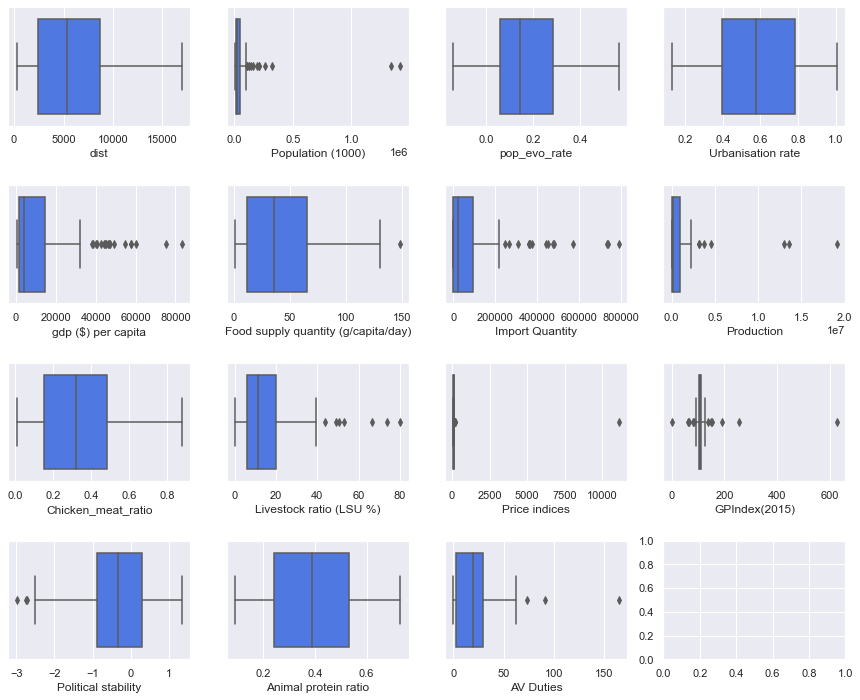

In [26]:
attributes = df.columns.drop(["Area", "alpha-3", "region"])

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
for a, ax in zip(attributes, axs.ravel()):
    sns.boxplot(df[a], ax=ax)
plt.show();

Graphiquement, présence d'outliers. Vérifions s'ils sont aberrants.

In [27]:
df.sort_values("Population (1000)", ascending=False)

Area alpha-3    region     dist  Population (1000)  \
43                      China     CHN      Asia  8225.23         1421021.79   
97                      India     IND      Asia  6594.23         1338676.78   
225  United States of America     USA  Americas  5838.16          325084.76   
98                  Indonesia     IDN      Asia 11584.25          264650.96   
158                  Pakistan     PAK      Asia  5932.59          207906.21   
..                        ...     ...       ...      ...                ...   
57                    Denmark     DNK    Europe  1027.61            5732.27   
72                    Finland     FIN    Europe  1911.14            5511.37   
193                  Slovakia     SVK    Europe  1094.61            5447.90   
156                    Norway     NOR    Europe  1342.89            5296.33   
46                      Congo     COG    Africa  6041.02            5110.69   

     pop_evo_rate  Urbanisation rate  gdp ($) per capita  \
43           0.06               0.57             8663.13   
97           0.13               0.34             1961.34   
225          0.08               0.82            60116.57   
98           0.14               0.55             3837.58   
158          0.24               0.35             1455.99   
..            ...                ...                 ...   
57           0.05               0.88            57938.80   
72           0.04               0.86            46310.12   
193          0.01               0.54            17528.67   
156          0.12               0.82            75220.81   
46           0.32               0.68             2154.63   

     Food supply quantity (g/capita/day)  Import Quantity  Production  \
43                                 27.00        450411.00 12970215.00   
97                                  8.00            18.00  3766940.00   
225                               131.00         58075.00 19140570.00   
98                                 21.00             0.00  3175853.00   
158                                13.00            64.00  1276000.00   
..                                   ...              ...         ...   
57                                 44.00         33812.00   151712.00   
72                                 44.00          5433.00   120800.00   
193                                35.00         48808.00    69656.00   
156                                50.00           526.00    90944.00   
46                                 54.00         94170.00     6766.00   

     Chicken_meat_ratio  Livestock ratio (LSU %)  Price indices  \
43                 0.15                    19.84         104.00   
97                 0.51                     4.26         110.11   
225                0.42                    13.97          98.47   
98                 0.76                    66.58         111.23   
158                0.31                    16.96         108.18   
..                  ...                      ...            ...   
57                 0.08                     4.39         102.90   
72                 0.30                     6.89          99.19   
193                0.48                    20.47         103.34   
156                0.25                    10.89         100.90   
46                 0.10                    10.72          98.73   

     GPIndex(2015)  Political stability  Animal protein ratio  AV Duties  
43          104.70                -0.30                  0.40      19.41  
97          115.93                -0.98                  0.22      37.37  
225         104.71                 0.47                  0.65      10.00  
98          151.89                -0.54                  0.31       5.16  
158         118.48                -2.26                  0.39      20.00  
..             ...                  ...                   ...        ...  
57           99.20                 0.95                  0.67       0.00  
72          108.95                 0.92                  0.63       0.00 

Pas d'outliers au niveau de la population, même si déséquilibre dû à la Chine et l'Inde.

In [28]:
df.sort_values("gdp ($) per capita", ascending=False)

Area alpha-3    region     dist  \
204                       Switzerland     CHE    Europe   436.08   
156                            Norway     NOR    Europe  1342.89   
225          United States of America     USA  Americas  5838.16   
57                            Denmark     DNK    Europe  1027.61   
11                          Australia     AUS   Oceania 16975.46   
..                                ...     ...       ...      ...   
190                      Sierra Leone     SLE    Africa  4724.35   
56   Democratic Republic of the Congo     COD    Africa  5908.00   
141                        Mozambique     MOZ    Africa  8855.66   
124                            Malawi     MWI    Africa  7650.66   
33                            Burundi     BDI    Africa  6371.99   

     Population (1000)  pop_evo_rate  Urbanisation rate  gdp ($) per capita  \
204            8455.80          0.12               0.74            83313.01   
156            5296.33          0.12               0.82            75220.81   
225          325084.76          0.08               0.82            60116.57   
57             5732.27          0.05               0.88            57938.80   
11            24584.62          0.18               0.85            57628.86   
..                 ...           ...                ...                 ...   
190            7488.42          0.25               0.42              499.38   
56            81398.76          0.39               0.44              462.45   
141           28649.02          0.32               0.37              461.41   
124           17670.20          0.32               0.18              359.23   
33            10827.02          0.38               0.13              297.13   

     Food supply quantity (g/capita/day)  Import Quantity  Production  \
204                                37.00         33791.00    90103.00   
156                                50.00           526.00    90944.00   
225                               131.00         58075.00 19140570.00   
57                                 44.00         33812.00   151712.00   
11                                131.00          3043.00  1229505.00   
..                                   ...              ...         ...   
190                                10.00         13070.00    15300.00   
56                                  4.00         95327.00    10314.00   
141                                11.00         22212.00    88958.00   
124                                20.00           353.00   130114.00   
33                                  2.00             4.00     6300.00   

     Chicken_meat_ratio  Livestock ratio (LSU %)  Price indices  \
204                0.19                     5.84         100.30   
156                0.25                    10.89         100.90   
225                0.42                    13.97          98.47   
57                 0.08                     4.39         102.90   
11                 0.28                     2.89         100.53   
..                  ...                      ...            ...   
190                0.36                    23.40         145.78   
56                 0.06                    12.92         116.04   
141                0.38                     9.94         148.52   
124                0.32                     7.34         154.65   
33                 0.16                     2.09         130.90   

     GPIndex(2015)  Political stability  Animal protein ratio  AV Duties  
204         104.85                 1.34                  0.63       0.00  
156         103.74                 1.15                  0.59       0.00  
225         104.71                 0.47                  0.65      10.00  
57           99.20                 0.95                  0.67       0.00  
11          108.17                 1.00                  0.67       0.00  
..             ...                  ...                   ...        ...  
190          97.82                -0.08                  0.2

Pas d'outliers au niveau du PIB (forte inégalité entre les pays).

In [29]:
df.sort_values("Import Quantity", ascending=False)

Area alpha-3    region     dist  Population (1000)  pop_evo_rate  \
134        Mexico     MEX  Americas  9206.81          124777.32          0.14   
94      Hong Kong     HKG      Asia  9639.48            7306.32          0.07   
186  Saudi Arabia     SAU      Asia  4694.50           33101.18          0.31   
106         Japan     JPN      Asia  9725.63          127502.73         -0.01   
197  South Africa     ZAF    Africa  9353.55           57009.76          0.16   
..            ...     ...       ...      ...                ...           ...   
103        Israel     ISR      Asia  3281.90            8243.85          0.20   
61        Ecuador     ECU  Americas  9367.10           16785.36          0.17   
2         Algeria     DZA    Africa  1340.39           41389.19          0.21   
163      Paraguay     PRY  Americas 10168.73            6867.06          0.14   
98      Indonesia     IDN      Asia 11584.25          264650.96          0.14   

     Urbanisation rate  gdp ($) per capita  \
134               0.83             9278.41   
94                1.01            46705.03   
186               0.83            20802.47   
106               0.92            38170.67   
197               0.66             6121.88   
..                 ...                 ...   
103               0.93            42850.55   
61                0.63             6213.50   
2                 0.72             4109.70   
163               0.61             5680.58   
98                0.55             3837.58   

     Food supply quantity (g/capita/day)  Import Quantity  Production  \
134                                88.00        788452.00  3211687.00   
94                                 73.00        736108.00    23400.00   
186                               102.00        730960.00   540258.00   
106                                40.00        569477.00  2214899.00   
197                                99.00        480346.00  1658159.00   
..                                   ...              ...         ...   
103                               149.00             0.00   538066.00   
61                                 55.00             0.00   338000.00   
2                                  17.00             0.00   262965.00   
163                                25.00             0.00    65890.00   
98                                 21.00             0.00  3175853.00   

     Chicken_meat_ratio  Livestock ratio (LSU %)  Price indices  \
134                0.47                    13.11         115.61   
94                 0.15                    23.50         106.44   
186                0.72                    49.03          97.84   
106                0.56                    35.15         105.15   
197                0.53                    12.28         120.81   
..                  ...                      ...            ...   
103                0.67                    53.00          96.98   
61                 0.43                    31.67         101.82   
2                  0.32                    21.30         111.02   
163                0.10                     2.14         116.94   
98                 0.76                    66.58         111.23   

     GPIndex(2015)  Political stability  Animal protein ratio  AV Duties  
134         108.07                -0.57                  0.49      28.46  
94           97.71                 0.79                  0.73       0.00  
186         116.21                -0.55                  0.39      18.93  
106         103.32                 1.06                  0.55       7.17  
197          97.12                -0.22                  0.43       4.54  
..             ...                  ...                   ...        ...  
103         106.41                -0.90                  0.59       0.00  
61          100.17                -0.08                  0.46      62.61  
2           101.10                -0.83                  0.28      30.00  
163         108.35                -0.07                

Pas d'incohérence après vérification de plusieurs sources :  
https://www.opportimes.com/mexican-chicken-imports-go-up-from-the-us/  
https://apps.fas.usda.gov/newgainapi/api/report/downloadreportbyfilename?filename=Poultry%20and%20Products%20Annual_Mexico%20City_Mexico_7-30-2019.pdf

In [30]:
df.sort_values("Production", ascending=False)

Area alpha-3    region     dist  Population (1000)  \
225  United States of America     USA  Americas  5838.16          325084.76   
28                     Brazil     BRA  Americas  9408.41          207833.82   
43                      China     CHN      Asia  8225.23         1421021.79   
173        Russian Federation     RUS    Europe  2494.32          145530.08   
97                      India     IND      Asia  6594.23         1338676.78   
..                        ...     ...       ...      ...                ...   
207                Tajikistan     TJK      Asia  5291.82            8880.27   
46                      Congo     COG    Africa  6041.02            5110.69   
162          Papua New Guinea     PNG   Oceania 14565.84            8438.04   
40                       Chad     TCD    Africa  4248.44           15016.75   
33                    Burundi     BDI    Africa  6371.99           10827.02   

     pop_evo_rate  Urbanisation rate  gdp ($) per capita  \
225          0.08               0.82            60116.57   
28           0.09               0.87             9925.42   
43           0.06               0.57             8663.13   
173          0.02               0.74            10840.23   
97           0.13               0.34             1961.34   
..            ...                ...                 ...   
207          0.26               0.27              848.67   
46           0.32               0.68             2154.63   
162          0.24               0.13             2695.26   
40           0.39               0.23              692.16   
33           0.38               0.13              297.13   

     Food supply quantity (g/capita/day)  Import Quantity  Production  \
225                               131.00         58075.00 19140570.00   
28                                124.00          3306.00 13607352.00   
43                                 27.00        450411.00 12970215.00   
173                                87.00        218669.00  4542244.00   
97                                  8.00            18.00  3766940.00   
..                                   ...              ...         ...   
207                                 9.00         30059.00     6829.00   
46                                 54.00         94170.00     6766.00   
162                                 7.00         22715.00     6498.00   
40                                  1.00           601.00     6486.00   
33                                  2.00             4.00     6300.00   

     Chicken_meat_ratio  Livestock ratio (LSU %)  Price indices  \
225                0.42                    13.97          98.47   
28                 0.49                     7.81         112.17   
43                 0.15                    19.84         104.00   
173                0.44                    20.38         108.13   
97                 0.51                     4.26         110.11   
..                  ...                      ...            ...   
207                0.02                     2.44         116.78   
46                 0.10                    10.72          98.73   
162                0.01                     8.64         108.13   
40                 0.01                     0.23          91.00   
33                 0.16                     2.09         130.90   

     GPIndex(2015)  Political stability  Animal protein ratio  AV Duties  
225         104.71                 0.47                  0.65      10.00  
28          104.97                -0.39                  0.56      10.00  
43          104.70                -0.30                  0.40      19.41  
173         112.73                -0.53                  0.53       0.00  
97          115.93                -0.98                  0.22      37.37  
..             ...                  ...                   ...        ...  
207         626.41                -0.74                  0.23      10.00  
46           99.65                -0.34                  0.46       5.00 

Pas d'incohérence, quelques pays très gros producteurs.

In [31]:
df.sort_values("Livestock ratio (LSU %)", ascending=False)

Area alpha-3  region     dist  Population (1000)  \
115                     Lebanon     LBN    Asia  3197.03            6819.37   
125                    Malaysia     MYS    Asia 10436.40           31104.65   
98                    Indonesia     IDN    Asia 11584.25          264650.96   
103                      Israel     ISR    Asia  3281.90            8243.85   
99   Iran (Islamic Republic of)     IRN    Asia  4218.44           80673.88   
..                          ...     ...     ...      ...                ...   
0                   Afghanistan     AFG    Asia  5590.38           36296.11   
201                       Sudan     SDN  Africa  4612.39           40813.40   
151                       Niger     NER  Africa  3932.64           21602.38   
68                     Ethiopia     ETH  Africa  5582.50          106399.92   
40                         Chad     TCD  Africa  4248.44           15016.75   

     pop_evo_rate  Urbanisation rate  gdp ($) per capita  \
115          0.43               0.79             7792.60   
125          0.16               0.77            10259.21   
98           0.14               0.55             3837.58   
103          0.20               0.93            42850.55   
99           0.13               0.75             5714.07   
..            ...                ...                 ...   
0            0.34               0.25              513.09   
201          0.00               0.34             2990.99   
151          0.47               0.16              517.08   
68           0.32               0.20              721.75   
40           0.39               0.23              692.16   

     Food supply quantity (g/capita/day)  Import Quantity  Production  \
115                                48.00          7848.00   125263.00   
125                               101.00         66697.00  1598258.00   
98                                 21.00             0.00  3175853.00   
103                               149.00             0.00   538066.00   
99                                 74.00          5556.00  2182126.00   
..                                   ...              ...         ...   
0                                   5.00         28937.00    27850.00   
201                                 4.00           431.00    68000.00   
151                                 3.00          2182.00    18426.00   
68                                  2.00           177.00    71938.00   
40                                  1.00           601.00     6486.00   

     Chicken_meat_ratio  Livestock ratio (LSU %)  Price indices  \
115                0.70                    80.22         104.60   
125                0.83                    73.56         109.68   
98                 0.76                    66.58         111.23   
103                0.67                    53.00          96.98   
99                 0.72                    50.69         125.56   
..                  ...                      ...            ...   
0                  0.10                     2.04         113.83   
201                0.07                     1.66         173.10   
151                0.10                     1.61         103.10   
68                 0.09                     1.42         123.81   
40                 0.01                     0.23          91.00   

     GPIndex(2015)  Political stability  Animal protein ratio  AV Duties  
115         119.14                -1.62                  0.32      19.30  
125         104.16                 0.26                  0.57       8.42  
98          151.89                -0.54                  0.31       5.16  
103         106.41                -0.90                  0.59       0.00  
99          104.97                -1.34                  0.28      19.30  
..             ...                  ...                   ...        ...  
0            82.65                -2.75                  0.19      32.10  
201         113.05                -1.81                  0.28      19.30  


Pays à forte consommation de poulets, RAS

In [32]:
df.sort_values("Price indices", ascending=False)

Area alpha-3    region    dist  \
229  Venezuela (Bolivarian Republic of)     VEN  Americas 7618.86   
118                               Libya     LBY    Africa 2007.72   
205                Syrian Arab Republic     SYR      Asia 3280.69   
5                                Angola     AGO    Africa 6510.32   
201                               Sudan     SDN    Africa 4612.39   
..                                  ...     ...       ...     ...   
100                                Iraq     IRQ      Asia 3867.43   
103                              Israel     ISR      Asia 3281.90   
112                          Kyrgyzstan     KGZ      Asia 5424.70   
107                              Jordan     JOR      Asia 3371.40   
40                                 Chad     TCD    Africa 4248.44   

     Population (1000)  pop_evo_rate  Urbanisation rate  gdp ($) per capita  \
229           29402.48          0.08               0.96             8429.07   
118            6580.72          0.10               0.77             3769.31   
205           17095.68         -0.14               0.57              780.40   
5             29816.77          0.43               0.65             4095.81   
201           40813.40          0.00               0.34             2990.99   
..                 ...           ...                ...                 ...   
100           37552.78          0.35               0.72             5076.69   
103            8243.85          0.20               0.93            42850.55   
112            6189.73          0.19               0.35             1244.47   
107            9785.84          0.56               0.90             4231.46   
40            15016.75          0.39               0.23              692.16   

     Food supply quantity (g/capita/day)  Import Quantity  Production  \
229                                45.00         23121.00   462413.00   
118                                77.00         56962.00   127593.00   
205                                20.00         24298.00   122180.00   
5                                  28.00        265888.00    40398.00   
201                                 4.00           431.00    68000.00   
..                                   ...              ...         ...   
100                                39.00        361904.00    96000.00   
103                               149.00             0.00   538066.00   
112                                 8.00         23142.00     7639.00   
107                                68.00         52808.00   192484.00   
40                                  1.00           601.00     6486.00   

     Chicken_meat_ratio  Livestock ratio (LSU %)  Price indices  \
229                0.44                     8.70       11086.19   
118                0.67                    22.38         211.21   
205                0.38                     6.50         183.82   
5                  0.14                     8.88         183.76   
201                0.07                     1.66         173.10   
..                  ...                      ...            ...   
100                0.53                    16.45          97.78   
103                0.67                    53.00          96.98   
112                0.03                     2.28          96.09   
107                0.79                    39.26          96.06   
40                 0.01                     0.23          91.00   

     GPIndex(2015)  Political stability  Animal protein ratio  AV Duties  
229          60.52                -1.32                  0.44      10.00  
118         102.04                -2.43                  0.39      19.30  
205          94.99                -2.73                  0.39      19.30  
5           105.41                -0.32                  0.30      10.00  
201         113.05                -1.81                  0.28      19.30  
..             ...                  ...                   ...        ...  
100         118.98                -2.52           

Forte dépréciation du bolivar au Venezuela. Forte instabilité politique. Suppression du pays.  
Les autres valeurs sont cohérentes.

In [33]:
df.drop(index=229, inplace=True)

In [34]:
df.sort_values("GPIndex(2015)", ascending=False)

Area alpha-3    region     dist  \
207                   Tajikistan     TJK      Asia  5291.82   
109                        Kenya     KEN    Africa  6491.40   
188                       Serbia     SRB    Europe  1525.00   
98                     Indonesia     IDN      Asia 11584.25   
124                       Malawi     MWI    Africa  7650.66   
..                           ...     ...       ...      ...   
50                          Cuba     CUB  Americas  7729.48   
146                  Netherlands     NLD    Europe   427.92   
0                    Afghanistan     AFG      Asia  5590.38   
223  United Republic of Tanzania     TZA    Africa  7168.28   
216                 Turkmenistan     TKM      Asia  4581.08   

     Population (1000)  pop_evo_rate  Urbanisation rate  gdp ($) per capita  \
207            8880.27          0.26               0.27              848.67   
109           50221.14          0.30               0.26             1572.35   
188            8829.63         -0.03               0.56             6275.19   
98           264650.96          0.14               0.55             3837.58   
124           17670.20          0.32               0.18              359.23   
..                 ...           ...                ...                 ...   
50            11339.25          0.01               0.78             8541.21   
146           17021.35          0.03               0.91            48989.64   
0             36296.11          0.34               0.25              513.09   
223           54660.34          0.34               0.35             1001.16   
216            5757.67          0.18               0.51             6585.16   

     Food supply quantity (g/capita/day)  Import Quantity  Production  \
207                                 9.00         30059.00     6829.00   
109                                 6.00            75.00   106473.00   
188                                27.00          7182.00    85018.00   
98                                 21.00             0.00  3175853.00   
124                                20.00           353.00   130114.00   
..                                   ...              ...         ...   
50                                 77.00        307421.00    29250.00   
146                                32.00        358733.00  1034319.00   
0                                   5.00         28937.00    27850.00   
223                                 3.00          2327.00    63597.00   
216                                12.00          9648.00    21364.00   

     Chicken_meat_ratio  Livestock ratio (LSU %)  Price indices  \
207                0.02                     2.44         116.78   
109                0.12                     2.91         121.59   
188                0.17                    10.03         102.26   
98                 0.76                    66.58         111.23   
124                0.32                     7.34         154.65   
..                  ...                      ...            ...   
50                 0.08                     6.64         100.00   
146                0.34                    13.14         104.21   
0                  0.10                     2.04         113.83   
223                0.11                     2.30         117.64   
216                0.07                     5.27         100.00   

     GPIndex(2015)  Political stability  Animal protein ratio  AV Duties  
207         626.41                -0.74                  0.23      10.00  
109         256.05                -1.17                  0.24      25.00  
188         191.94                 0.02                  0.49       0.00  
98          151.89                -0.54                  0.31       5.16  
124         149.76                -0.42                  0.12      24.21  
..             ...                  ...                   ...        ...  
50           90.43                 0.66                  0.38       5.00  
146          84.85                 0.86 

RAS

In [35]:
df.sort_values("AV Duties", ascending=False)

Area alpha-3    region    dist  Population (1000)  \
44             Colombia     COL  Americas 8707.68           48909.84   
140             Morocco     MAR    Africa 1816.85           35581.25   
112          Kyrgyzstan     KGZ      Asia 5424.70            6189.73   
61              Ecuador     ECU  Americas 9367.10           16785.36   
215              Turkey     TUR      Asia 2255.81           81116.45   
..                  ...     ...       ...     ...                ...   
173  Russian Federation     RUS    Europe 2494.32          145530.08   
19              Belgium     BEL    Europe  262.38           11419.75   
188              Serbia     SRB    Europe 1525.00            8829.63   
18              Belarus     BLR    Europe 1823.71            9450.23   
31             Bulgaria     BGR    Europe 1760.71            7102.44   

     pop_evo_rate  Urbanisation rate  gdp ($) per capita  \
44           0.12               0.81             6376.71   
140          0.14               0.62             3082.60   
112          0.19               0.35             1244.47   
61           0.17               0.63             6213.50   
215          0.17               0.74            10589.57   
..            ...                ...                 ...   
173          0.02               0.74            10840.23   
19           0.07               0.98            44020.07   
188         -0.03               0.56             6275.19   
18          -0.00               0.78             5790.91   
31          -0.06               0.74             8300.17   

     Food supply quantity (g/capita/day)  Import Quantity  Production  \
44                                 90.00         54123.00  1563607.00   
140                                52.00           404.00   690000.00   
112                                 8.00         23142.00     7639.00   
61                                 55.00             0.00   338000.00   
215                                57.00          2752.00  2136734.00   
..                                   ...              ...         ...   
173                                87.00        218669.00  4542244.00   
19                                 25.00        212149.00   455364.00   
188                                27.00          7182.00    85018.00   
18                                 76.00         17840.00   460000.00   
31                                 53.00         96121.00    87029.00   

     Chicken_meat_ratio  Livestock ratio (LSU %)  Price indices  \
44                 0.58                     7.78         113.02   
140                0.53                    26.08         105.67   
112                0.03                     2.28          96.09   
61                 0.43                    31.67         101.82   
215                0.60                    19.41         124.08   
..                  ...                      ...            ...   
173                0.44                    20.38         108.13   
19                 0.25                     6.76         104.28   
188                0.17                    10.03         102.26   
18                 0.39                    11.74         120.60   
31                 0.41                    20.03         104.34   

     GPIndex(2015)  Political stability  Animal protein ratio  AV Duties  
44          110.01                -0.79                  0.51     164.70  
140         111.74                -0.34                  0.27      91.08  
112         101.99                -0.58                  0.40      73.13  
61          100.17                -0.08                  0.46      62.61  
215         112.80                -1.31                  0.34      60.04  
..             ...                  ...                   ...        ...  
173         112.73                -0.53                  0.53       0.00  
19          111.47                 0.41                  0.59       0.00  
188         191.94                 0.02                  0.49       0.00  
1

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 235
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Area                                 114 non-null    object 
 1   alpha-3                              114 non-null    object 
 2   region                               114 non-null    object 
 3   dist                                 114 non-null    float64
 4   Population (1000)                    114 non-null    float64
 5   pop_evo_rate                         114 non-null    float64
 6   Urbanisation rate                    114 non-null    float64
 7   gdp ($) per capita                   114 non-null    float64
 8   Food supply quantity (g/capita/day)  114 non-null    float64
 9   Import Quantity                      114 non-null    float64
 10  Production                           114 non-null    float64
 11  Chicken_meat_ratio              

### 1-4 Analyse de la distribution des variables quantitatives

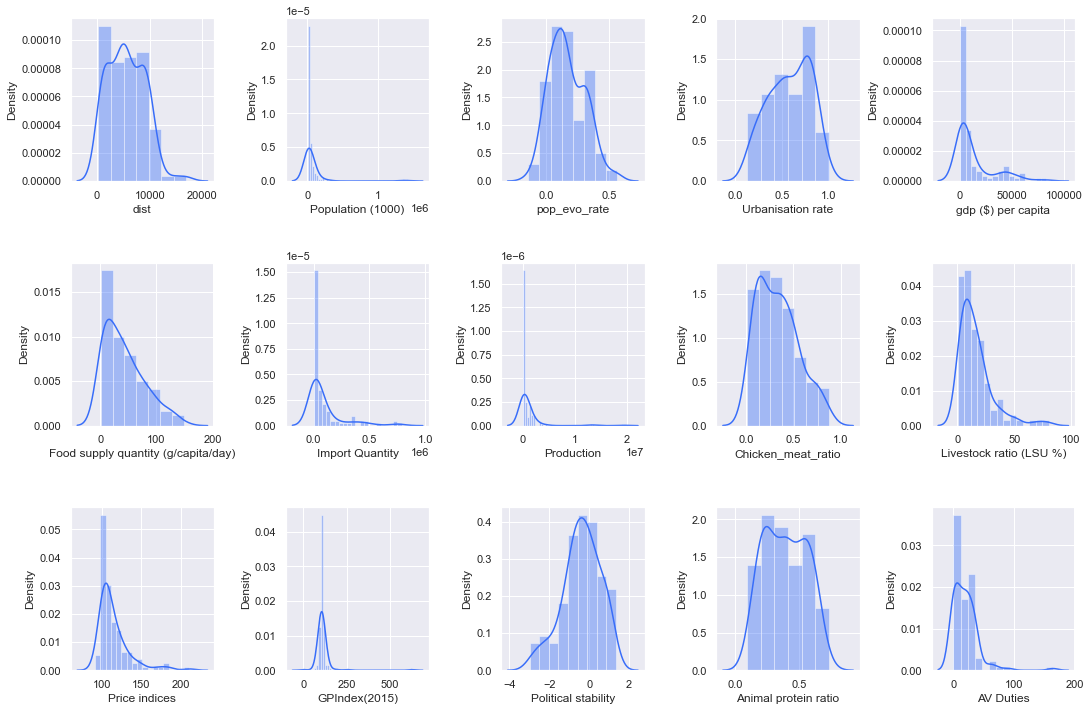

In [37]:
attributes = df.columns.drop(["Area", "alpha-3", "region"])

fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(18, 12))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
for a, ax in zip(attributes, axs.ravel()):
    sns.distplot(df[a], ax=ax)
plt.show();

### 1-5 Analyse bivariée

<Figure size 864x720 with 0 Axes>

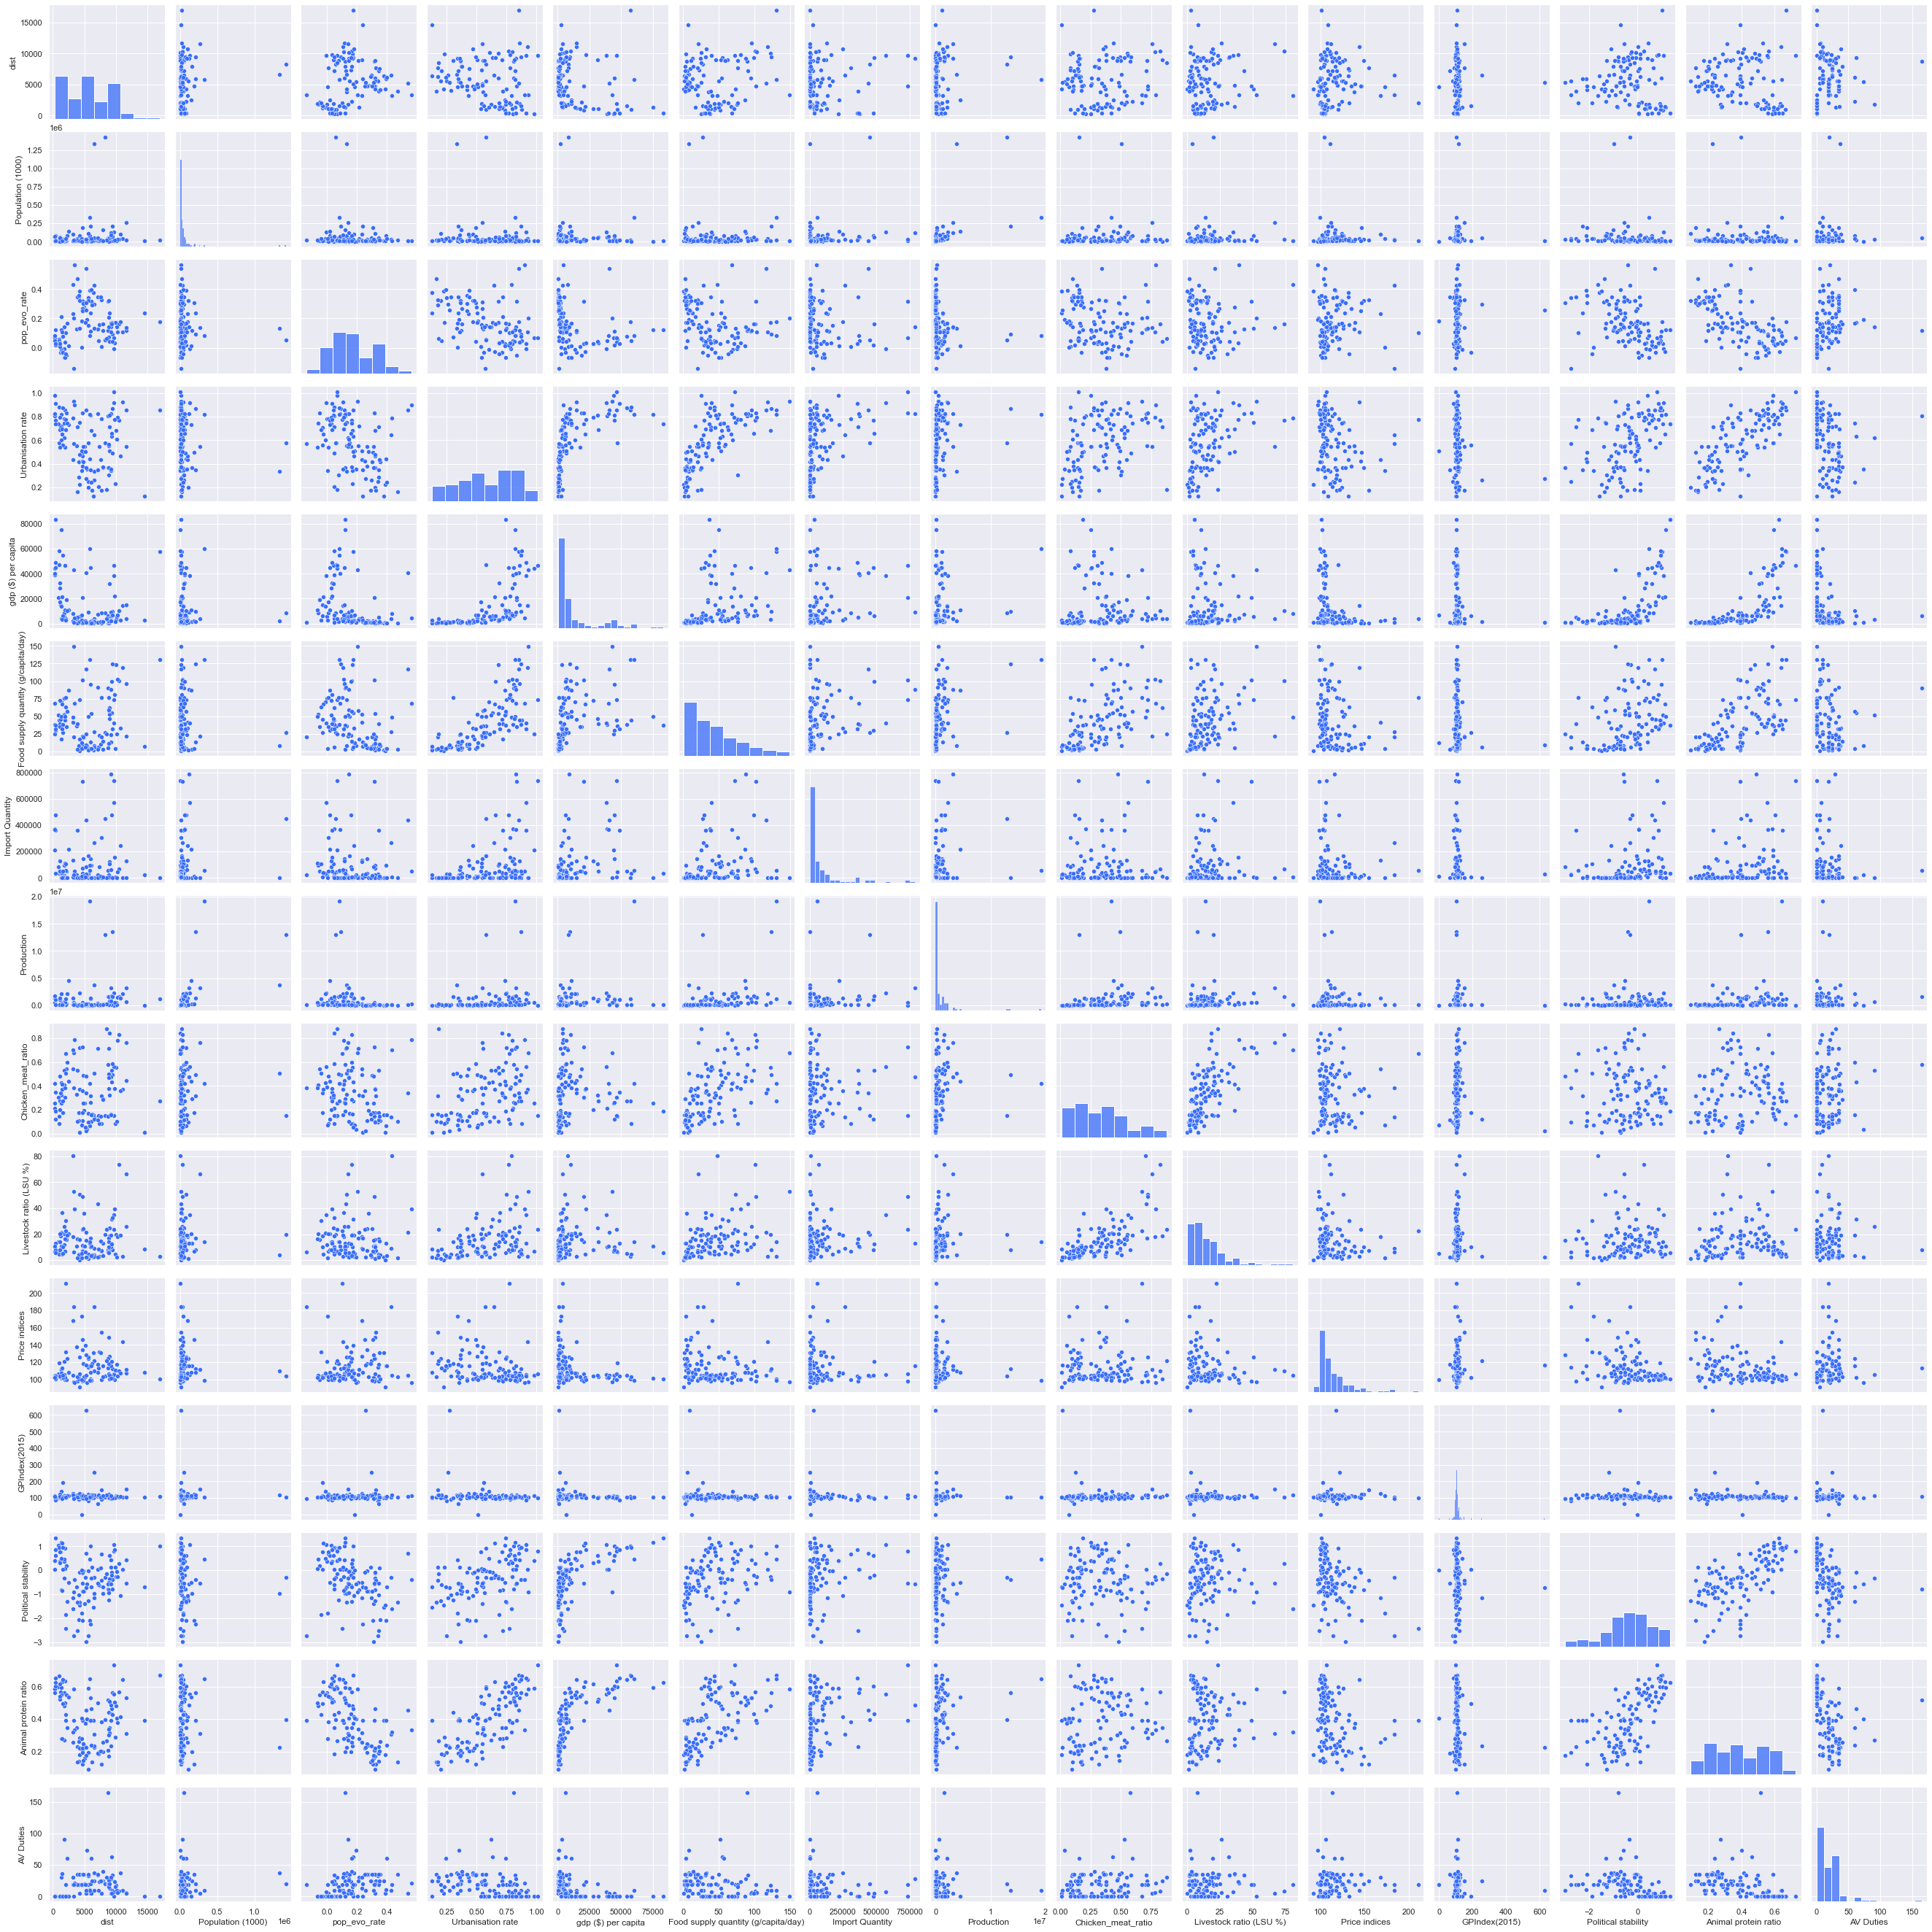

In [38]:
plt.figure(figsize=(12, 10))
sns.pairplot(df, corner=False)
plt.show();

# 2-  Featuring

Création de 2 nouvelles variables rapportant les quantités de production et d'importation à la population.

In [39]:
# Calcul de la production par 1000 habitants
df["Production per 1000 capita"] = df["Production"] / df["Population (1000)"]

# Calcul des importations par 1000 habitants
df["Importation per 1000 capita"] = df["Import Quantity"] / df["Population (1000)"]

In [40]:
df.drop(columns=["Import Quantity", "Production"], inplace=True)

In [41]:
df.head()

Area alpha-3    region     dist  Population (1000)  pop_evo_rate  \
0   Afghanistan     AFG      Asia  5590.38           36296.11          0.34   
2       Algeria     DZA    Africa  1340.39           41389.19          0.21   
5        Angola     AGO    Africa  6510.32           29816.77          0.43   
8     Argentina     ARG  Americas 11072.25           43937.14          0.11   
11    Australia     AUS   Oceania 16975.46           24584.62          0.18   

    Urbanisation rate  gdp ($) per capita  \
0                0.25              513.09   
2                0.72             4109.70   
5                0.65             4095.81   
8                0.92            14627.62   
11               0.85            57628.86   

    Food supply quantity (g/capita/day)  Chicken_meat_ratio  \
0                                  5.00                0.10   
2                                 17.00                0.32   
5                                 28.00                0.14   
8                                119.00                0.37   
11                               131.00                0.28   

    Livestock ratio (LSU %)  Price indices  GPIndex(2015)  \
0                      2.04         113.83          82.65   
2                     21.30         111.02         101.10   
5                      8.88         183.76         105.41   
8                      2.66         143.48         104.41   
11                     2.89         100.53         108.17   

    Political stability  Animal protein ratio  AV Duties  \
0                 -2.75                  0.19      32.10   
2                 -0.83                  0.28      30.00   
5                 -0.32                  0.30      10.00   
8                  0.02                  0.64      10.00   
11                 1.00                  0.67       0.00   

    Production per 1000 capita  Importation per 1000 capita  
0                         0.77                         0.80  
2                         6.35                         0.00  
5                         1.35                         8.92  
8                        48.16                         0.05  
11                       50.01                         0.12

In [42]:
df.to_csv("data_prep/df_final.csv", index=False)

**Dataframe final sur lequel va se porter notre étude de marché**